# CS 452/552 Data Science with Python: Homework 2

<b> Name: </b> Esrah Zahid <br>
<b> Student ID: </b> S020289 

Download data files from LMS. Code/Explain your solution over this `IPython` notebook at required cells, and complete locally.

To submit your assignment, in LMS, upload your solution to LMS as a single notebook with following file name format:

`lastName_firstName_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 452 or CS 552).

Problems on homework assignments are equally weighted. `The Challenge Question is required for CS 552 students and optional for all others.`

Any type of plagiarism will not be tolerated. Your submitted codes will be compared with other submissions and also the codes available on internet and violations will have a penalty of -100 points. (In case of copying from
another student both parties will get -100)

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

In [2]:
def multiple_linear_regression_fit(x_train, y_train):
    x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    x_train_transpose = x_train.T
    xt_x = np.dot(x_train_transpose, x_train)
    xt_x_inverse = np.linalg.inv(xt_x)
    xt_y = np.dot(x_train_transpose, y_train)
    theta = np.dot(xt_x_inverse, xt_y)
    intercept = theta[0]
    coefficients = theta[1:]
    
    return coefficients, intercept

def multiple_linear_regression_score(coefficients, intercept, x_test, y_test):
    x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
    y_pred = np.dot(x_test, np.hstack((intercept, coefficients)))
    ss_res = np.sum((y_test - y_pred) ** 2)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, y_pred

train_data = pd.read_csv('datasets/dataset_1_train.txt')
x_train, y_train = train_data[['horsepower', ' highway MPG']].copy(), train_data[' price'].copy()

test_data = pd.read_csv('datasets/dataset_1_test.txt')
x_test, y_test = test_data[['horsepower', ' highway MPG']].copy(), test_data[' price'].copy()

coefficients, intercept = multiple_linear_regression_fit(x_train, y_train)
r_squared, y_pred = multiple_linear_regression_score(coefficients, intercept, x_test, y_test)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R^2 score:", r_squared)


Coefficients: [  25.18654735 -598.10976496]
Intercept: 29887.995923315357
R^2 score: 0.17794462732710958


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

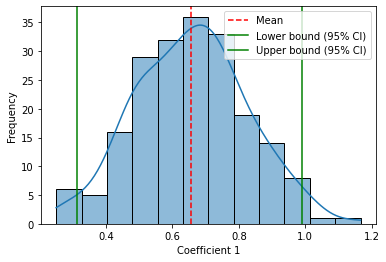

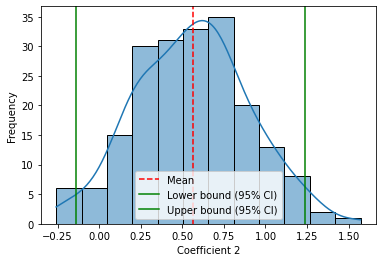

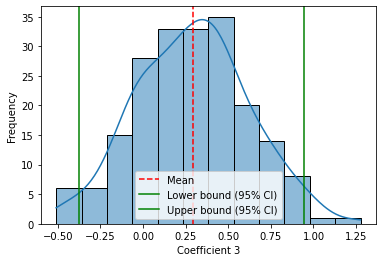

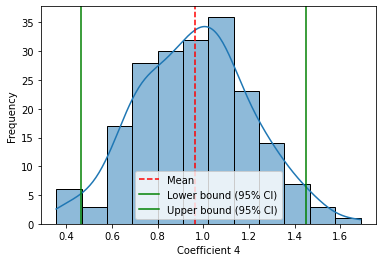

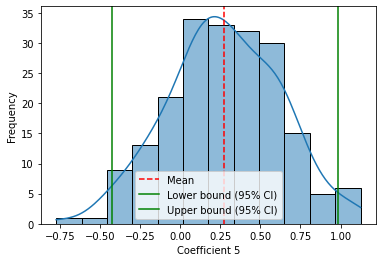

Confidence intervals from bootstrapping: [lower, upper]
Coefficient 1: [0.3121081587160006 0.9894537225802197]
Coefficient 2: [-0.13673095635895152 1.2370304279756965]
Coefficient 3: [-0.3729669643449597 0.9468833263934358]
Coefficient 4: [0.46352686934842496 1.4513430671795504]
Coefficient 5: [-0.4277296184998704 0.9864028386742576]

Confidence intervals from statsmodels: [lower, upper]
Coefficient 1: [2.49744848 2.50220506]
Coefficient 2: [0.55277262 0.75038508]
Coefficient 3: [0.35223041 0.74974337]
Coefficient 4: [0.08891385 0.47338926]
Coefficient 5: [0.80980994 1.09854837]


In [3]:
data = pd.read_csv('datasets/dataset_2.txt')
x, y = data.iloc[:, :5].values, data.iloc[:, 5].values

n_subsamples = 200
subsample_size = 100

coefficients_all = []

for i in range(n_subsamples):
    subsample = data.sample(subsample_size)
    x_sub, y_sub = subsample.iloc[:, :5].values, subsample.iloc[:, 5].values
    coefficients, intercept = multiple_linear_regression_fit(x_sub, y_sub)
    coefficients_all.append(coefficients)

coefficients_all = np.array(coefficients_all)

mean_coefficients = np.mean(coefficients_all, axis=0)
lower_bounds = np.percentile(coefficients_all, 2.5, axis=0)
upper_bounds = np.percentile(coefficients_all, 97.5, axis=0)


for i in range(5):
    plt.figure()
    sns.histplot(coefficients_all[:, i], kde=True)
    plt.axvline(mean_coefficients[i], color='r', linestyle='--', label='Mean')
    plt.axvline(lower_bounds[i], color='g', linestyle='-', label='Lower bound (95% CI)')
    plt.axvline(upper_bounds[i], color='g', linestyle='-', label='Upper bound (95% CI)')
    plt.xlabel(f'Coefficient {i + 1}')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

x_with_constant = sm.add_constant(x)
ols_model = sm.OLS(y, x_with_constant).fit()
ci_statsmodels = ols_model.conf_int(alpha=0.05)

print("Confidence intervals from bootstrapping: [lower, upper]")
for i in range(5):
    print(f"Coefficient {i + 1}: [{lower_bounds[i]} {upper_bounds[i]}]")

print("\nConfidence intervals from statsmodels: [lower, upper]")
for i in range(5):
    print(f"Coefficient {i + 1}: {ci_statsmodels[i]}")  # Exclude the intercept row

**Explanation:**

We can see that the confidence intervals obtained from the bootstrapping method are wider compared to the ones obtained using statsmodels. This difference could be due to the approximation involved in the bootstrapping approach, which relies on resampling the dataset to estimate the true distribution of the coefficients. In contrast, the statsmodels approach assumes a linear relationship between the predictor and response variables and calculates the confidence intervals based on that assumption. The wider confidence intervals from bootstrapping could also be due to the small sample size (100) used for each subsample.

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

### Polynomial Regression $$y_i =β0 +β_1x_i +β_2x^2_i +β_3x^3_i +...+β_d x^d_i +ε_i$$

**Solution:**

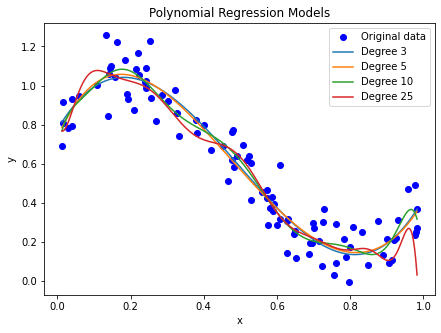

In [4]:
def create_polynomial_features(x, degree):
    x_poly = np.column_stack([x ** i for i in range(1, degree + 1)])
    return x_poly

def polynomial_regression_fit(x_train, y_train, degree):
    x_poly = create_polynomial_features(x_train, degree)
    coefficients, intercept = multiple_linear_regression_fit(x_poly, y_train)
    return coefficients, intercept

def polynomial_regression_predict(coefficients, intercept, degree, x_test):
    x_poly = create_polynomial_features(x_test, degree)
    y_pred = np.dot(x_poly, coefficients) + intercept
    return y_pred

def polynomial_regression_score(y_pred, y_test):
    r2 = r2_score(y_test, y_pred)
    sum_squared_errors = np.sum((y_test - y_pred) ** 2)
    return r2, sum_squared_errors

data = pd.read_csv('datasets/dataset_3.txt', delimiter=',')
x, y = data.iloc[:, 0].values.reshape(-1, 1), data.iloc[:, 1].values

degrees = [3, 5, 10, 25]

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label='Original data')

x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)

for degree in degrees:
    coefficients, intercept = polynomial_regression_fit(x, y, degree)
    y_plot = polynomial_regression_predict(coefficients, intercept, degree, x_plot)
    plt.plot(x_plot, y_plot, label=f'Degree {degree}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Models')
plt.show()

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

**Solution:**

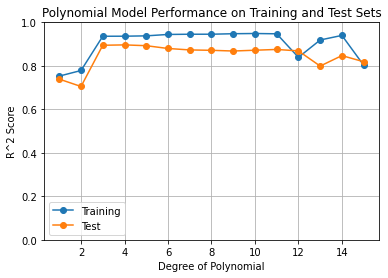

In [6]:
train_data = data.sample(frac=0.5, random_state=42)
test_data = data.drop(train_data.index)

x_train, y_train = train_data.iloc[:, 0].values.reshape(-1, 1), train_data.iloc[:, 1].values
x_test, y_test = test_data.iloc[:, 0].values.reshape(-1, 1), test_data.iloc[:, 1].values

max_degree = 15
r2_train = []
r2_test = []

for degree in range(1, max_degree + 1):
    coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)
    
    y_train_pred = polynomial_regression_predict(coefficients, intercept, degree, x_train)
    r2_train_score, _ = polynomial_regression_score(y_train_pred, y_train)
    
    y_test_pred = polynomial_regression_predict(coefficients, intercept, degree, x_test)
    r2_test_score, _ = polynomial_regression_score(y_test_pred, y_test)
    
    r2_train.append(r2_train_score)
    r2_test.append(r2_test_score)

plt.plot(range(1, max_degree + 1), r2_train, 'o-', label='Training')
plt.plot(range(1, max_degree + 1), r2_test, 'o-', label='Test')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)
plt.legend()
plt.title('Polynomial Model Performance on Training and Test Sets')
plt.grid()
plt.show()



## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

**Solution:**

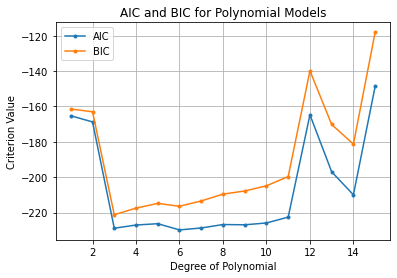

Best model according to AIC: 6
Best model according to BIC: 3


In [7]:
def compute_aic_bic(y_true, y_pred, n_params):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals ** 2)
    
    aic = n * np.log(rss / n) + 2 * n_params
    bic = n * np.log(rss / n) + np.log(n) * n_params

    return aic, bic

aic_values = []
bic_values = []

for degree in range(1, max_degree + 1):
    coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)
    y_train_pred = polynomial_regression_predict(coefficients, intercept, degree, x_train)
    
    n_params = degree + 1  
    aic, bic = compute_aic_bic(y_train, y_train_pred, n_params)
    
    aic_values.append(aic)
    bic_values.append(bic)

plt.plot(range(1, max_degree + 1), aic_values, '.-', label='AIC')
plt.plot(range(1, max_degree + 1), bic_values, '.-', label='BIC')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Criterion Value')
plt.legend()
plt.title('AIC and BIC for Polynomial Models')
plt.grid()
plt.show()

best_aic_degree = np.argmin(aic_values) + 1
best_bic_degree = np.argmin(bic_values) + 1

print(f"Best model according to AIC: {best_aic_degree}")
print(f"Best model according to BIC: {best_bic_degree}")

**Explanation:**

The findings from this exercise show that we can use information criteria like AIC and BIC to select the best polynomial model using only the training set information. Both AIC and BIC help us identify a balance between model complexity and the goodness of fit.

In this case, the BIC criterion selected a polynomial model of degree 3, which matched our earlier observation based on the test R^2 score analysis. The AIC criterion selected a slightly more complex model with a degree of 6. This indicates that BIC tends to favor simpler models compared to AIC.


### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.


The data set for this problem exists in file "green_tripdata_2015-01.csv". The file contains the details of all pickups by Green cabs in New York City during January 2015. 

**Solution:**

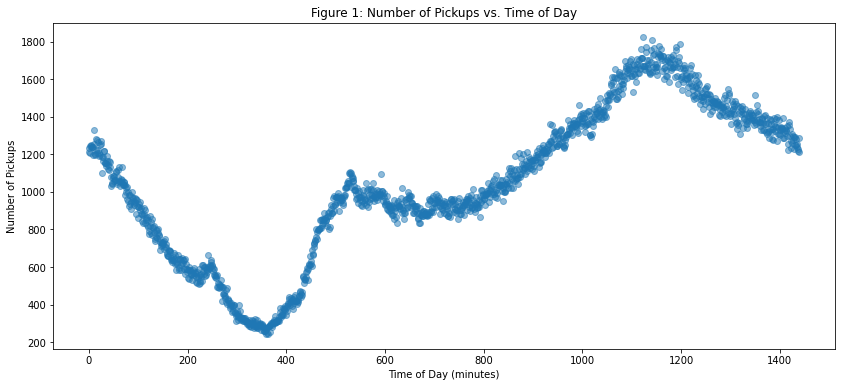

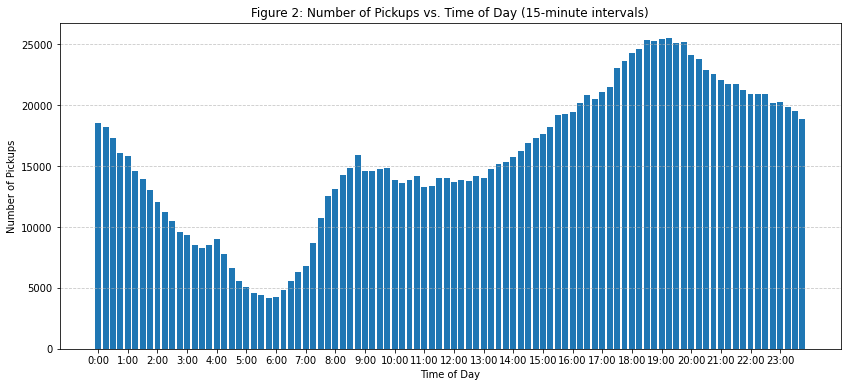

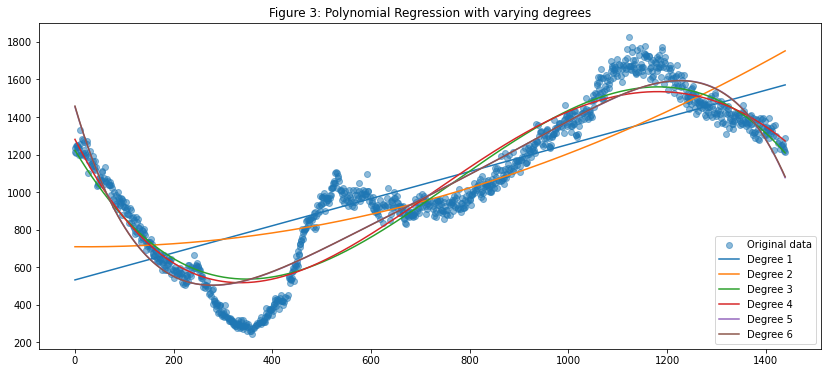

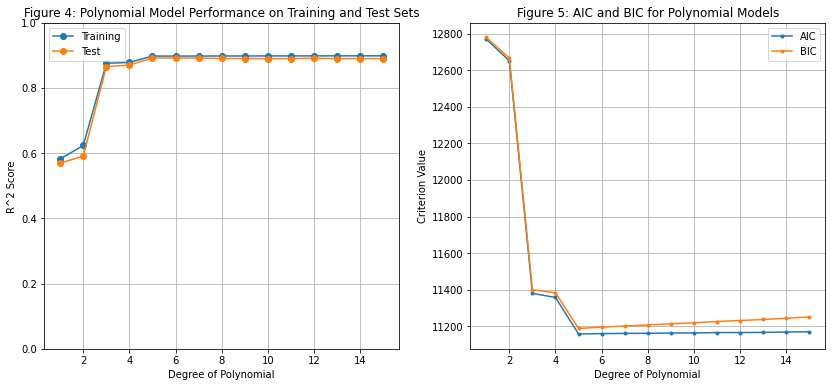

Best model according to AIC: 5
Best model according to BIC: 5


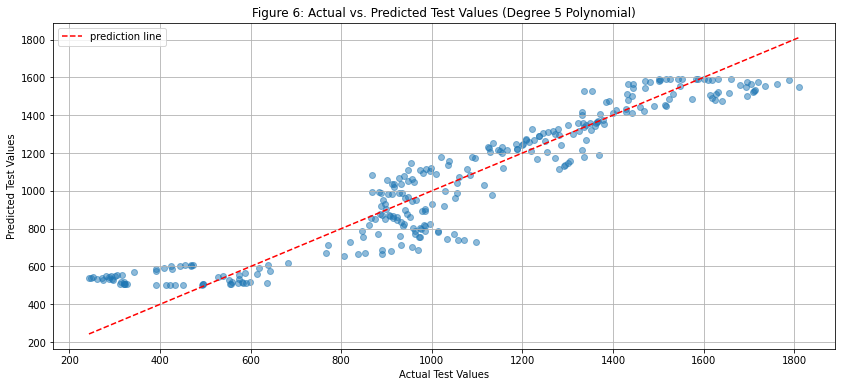

In [8]:
def datetime_to_minutes(dt):
    return dt.hour * 60 + dt.minute

def visualize_pickup():
    plt.figure(figsize=(14, 6))
    plt.scatter(pickup_counts['time_of_day'], pickup_counts['pickups'], alpha=0.5)
    plt.title("Figure 1: Number of Pickups vs. Time of Day")
    plt.xlabel("Time of Day (minutes)")
    plt.ylabel("Number of Pickups")
    plt.show()
    
    bin_edges = np.arange(0, 24*60+15, 15)
    bins = pd.cut(data['time_of_day'], bin_edges, right=False)
    pickup_counts_15min = data.groupby(bins).size().reset_index(name='pickups')
    fig, ax = plt.subplots(figsize=(14, 6))
    x_values = bin_edges[:-1]
    ax.bar(x_values, pickup_counts_15min['pickups'], width=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    xticks = np.arange(0, 24*60, 60)
    xtick_labels = [f"{hour}:00" for hour in range(24)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_xlabel("Time of Day")
    ax.set_ylabel("Number of Pickups")
    ax.set_title("Figure 2: Number of Pickups vs. Time of Day (15-minute intervals)")
    plt.show()


data = pd.read_csv("datasets/green_tripdata_2015-01.csv", index_col=False)
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['Lpep_dropoff_datetime'] = pd.to_datetime(data['Lpep_dropoff_datetime'])
data.dropna(axis='columns')
data['time_of_day'] = data['lpep_pickup_datetime'].apply(datetime_to_minutes)

pickup_counts = data.groupby('time_of_day').size().reset_index(name='pickups')

visualize_pickup()

x = pickup_counts['time_of_day'].values.reshape(-1, 1)
y = pickup_counts['pickups'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#########################################################
degrees = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(14,6))
plt.scatter(x_train, y_train, label='Original data', alpha=0.5)
plt.title('Figure 3: Polynomial Regression with varying degrees')
x_plot = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
for degree in degrees:
    coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)
    y_plot = polynomial_regression_predict(coefficients, intercept, degree, x_plot)
    plt.plot(x_plot, y_plot, label=f'Degree {degree}')
plt.legend(loc='best')
plt.show()

#########################################################
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

max_degree = 15
r2_train = []
r2_test = []

for degree in range(1, max_degree + 1):
    coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)
    
    y_train_pred = polynomial_regression_predict(coefficients, intercept, degree, x_train)
    r2_train_score, _ = polynomial_regression_score(y_train_pred, y_train)
    
    y_test_pred = polynomial_regression_predict(coefficients, intercept, degree, x_test)
    r2_test_score, _ = polynomial_regression_score(y_test_pred, y_test)
    
    r2_train.append(r2_train_score)
    r2_test.append(r2_test_score)

ax1.plot(range(1, max_degree + 1), r2_train, 'o-', label='Training')
ax1.plot(range(1, max_degree + 1), r2_test, 'o-', label='Test')
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('R^2 Score')
ax1.set_ylim(0, 1)
ax1.legend()
ax1.set_title('Figure 4: Polynomial Model Performance on Training and Test Sets')
ax1.grid()

#########################################################
aic_values = []
bic_values = []

for degree in range(1, max_degree + 1):
    coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)
    y_train_pred = polynomial_regression_predict(coefficients, intercept, degree, x_train)
    
    n_params = degree + 1  
    aic, bic = compute_aic_bic(y_train, y_train_pred, n_params)
    
    aic_values.append(aic)
    bic_values.append(bic)

ax2.plot(range(1, max_degree + 1), aic_values, '.-', label='AIC')
ax2.plot(range(1, max_degree + 1), bic_values, '.-', label='BIC')
ax2.set_xlabel('Degree of Polynomial')
ax2.set_ylabel('Criterion Value')
ax2.legend()
ax2.set_title('Figure 5: AIC and BIC for Polynomial Models')
ax2.grid()

plt.show()

best_aic_degree = np.argmin(aic_values) + 1
best_bic_degree = np.argmin(bic_values) + 1

print(f"Best model according to AIC: {best_aic_degree}")
print(f"Best model according to BIC: {best_bic_degree}")

########################################################
degree = 5

coefficients, intercept = polynomial_regression_fit(x_train, y_train, degree)

y_test_pred = polynomial_regression_predict(coefficients, intercept, degree, x_test)

plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='prediction line')

plt.xlabel("Actual Test Values")
plt.ylabel("Predicted Test Values")
plt.title("Figure 6: Actual vs. Predicted Test Values (Degree 5 Polynomial)")
plt.legend()
plt.grid()
plt.show()

**Explanation:**

My observations from various tests and figures given above:

Figure 1: A scatter plot to show pickups throughout the day <br>
Figure 2: Using this and the above figure we can deduce the density of available taxi cabs to be at its peak at around 19:00 and lowest at around 6:00<br>
Figure 3: Polynomials of degree 3, 4 and 5 appear to be better fits compared to the rest of the ploynomials <br>
Figure 4: R^2 score shows that polynomial of degree 5 gives the best fit<br>
Figure 5: AIC and BIC score show that polynomial of degree 5 gives the best fit<br>
Figure 6: shows the results after predicting the test values<br>

## Challenge Problem (only for 552 students): Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

**Solution:**

In [9]:
#Code here

**Explanation:**

In [10]:
#Explanation here

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?

**Solution:**

In [11]:
#Code here

**Explanation:**

In [12]:
#Explanation here